# 2. Exploratory data analysis and visualization

##  Import  library

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

sns.set()
%matplotlib inline


## Load data

In [2]:
train = pd.read_csv("data/train.csv")
adFeature = pd.read_csv("data/adFeature.csv")
userFeature = pd.read_csv("data/userFeature_1.csv")
#userFeature = pd.read_csv("data/userFeature.csv")

**Firstly, we analyse the composition of training data**

In [3]:
train.head()

,aid,uid,label
0,311,36722734,-1
1,1201,35790079,-1
2,311,42796542,-1
3,529,14839509,-1
4,681,69618097,-1


In [39]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923875 entries, 0 to 923874
Data columns (total 3 columns):
aid      923875 non-null int64
uid      923875 non-null int64
label    923875 non-null int64
dtypes: int64(3)
memory usage: 21.1 MB


In [4]:
print("The number of users in training data is %d \nThe number of advertisements in training data is %d" 
      % (len(train['uid'].unique()), len(train['aid'].unique())))

The number of users in training data is 911216 
The number of advertisements in training data is 173


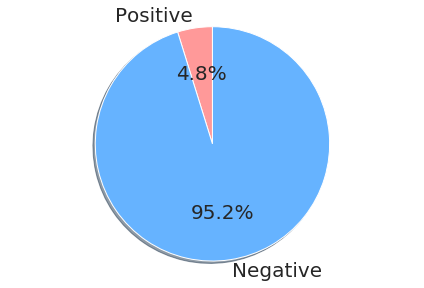

In [5]:
# Pie chart
labels = ['Positive', 'Negative']
sizes = [train["label"].value_counts()[1]/len(train) , train["label"].value_counts()[-1]/len(train)]
explode = (0, 0)

#add colors
colors = ['#ff9999','#66b3ff']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%',textprops={'fontsize': 20},
        shadow=True, startangle=90)

ax1.axis('equal')
plt.tight_layout()
plt.show()

<div class="alert alert-success">
We can find that those training data are highly unbalanced as a binary classification
</div>

**Secondly, we analyse the composition of advertisement features**

In [6]:
adFeature.head()

,aid,advertiserId,campaignId,creativeId,creativeSize,adCategoryId,productId,productType
0,2169,16770,38402,43877,35,89,9760,9
1,411,9106,163120,220179,79,21,0,4
2,894,452,38391,43862,35,10,12193,11
3,450,45705,352827,565415,42,67,0,4
4,313,243,531344,979528,22,27,113,9


In [7]:
adFeature.dtypes

aid             int64
advertiserId    int64
campaignId      int64
creativeId      int64
creativeSize    int64
adCategoryId    int64
productId       int64
productType     int64
dtype: object

We can analyse the distribution of advertisement catagory and product type.

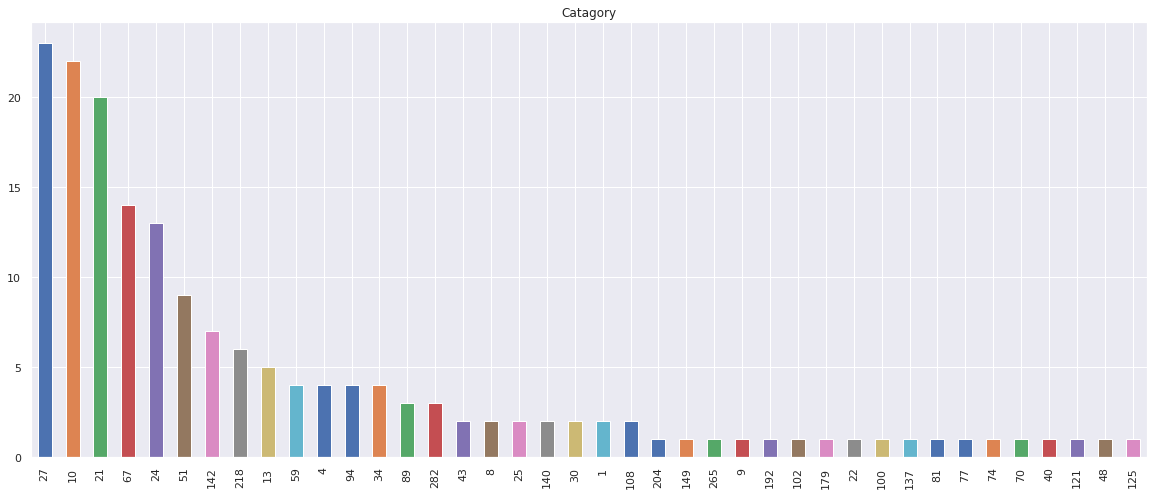

In [8]:
adFeature['adCategoryId'].value_counts().plot.bar(figsize=(20,8),title="Catagory")

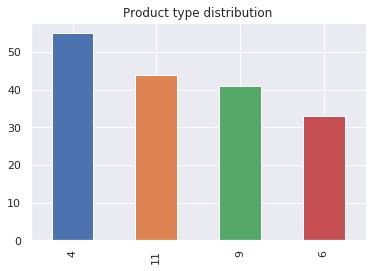

In [9]:
adFeature['productType'].value_counts().plot.bar(title="Product type distribution")

We can also show the corelation of some features

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


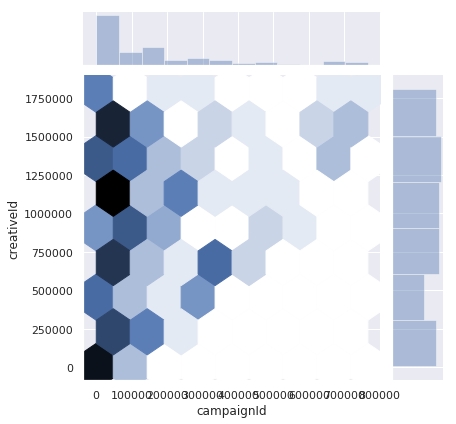

In [10]:
sns.jointplot(x='campaignId', y='creativeId', data=adFeature, kind='hex', gridsize=8)

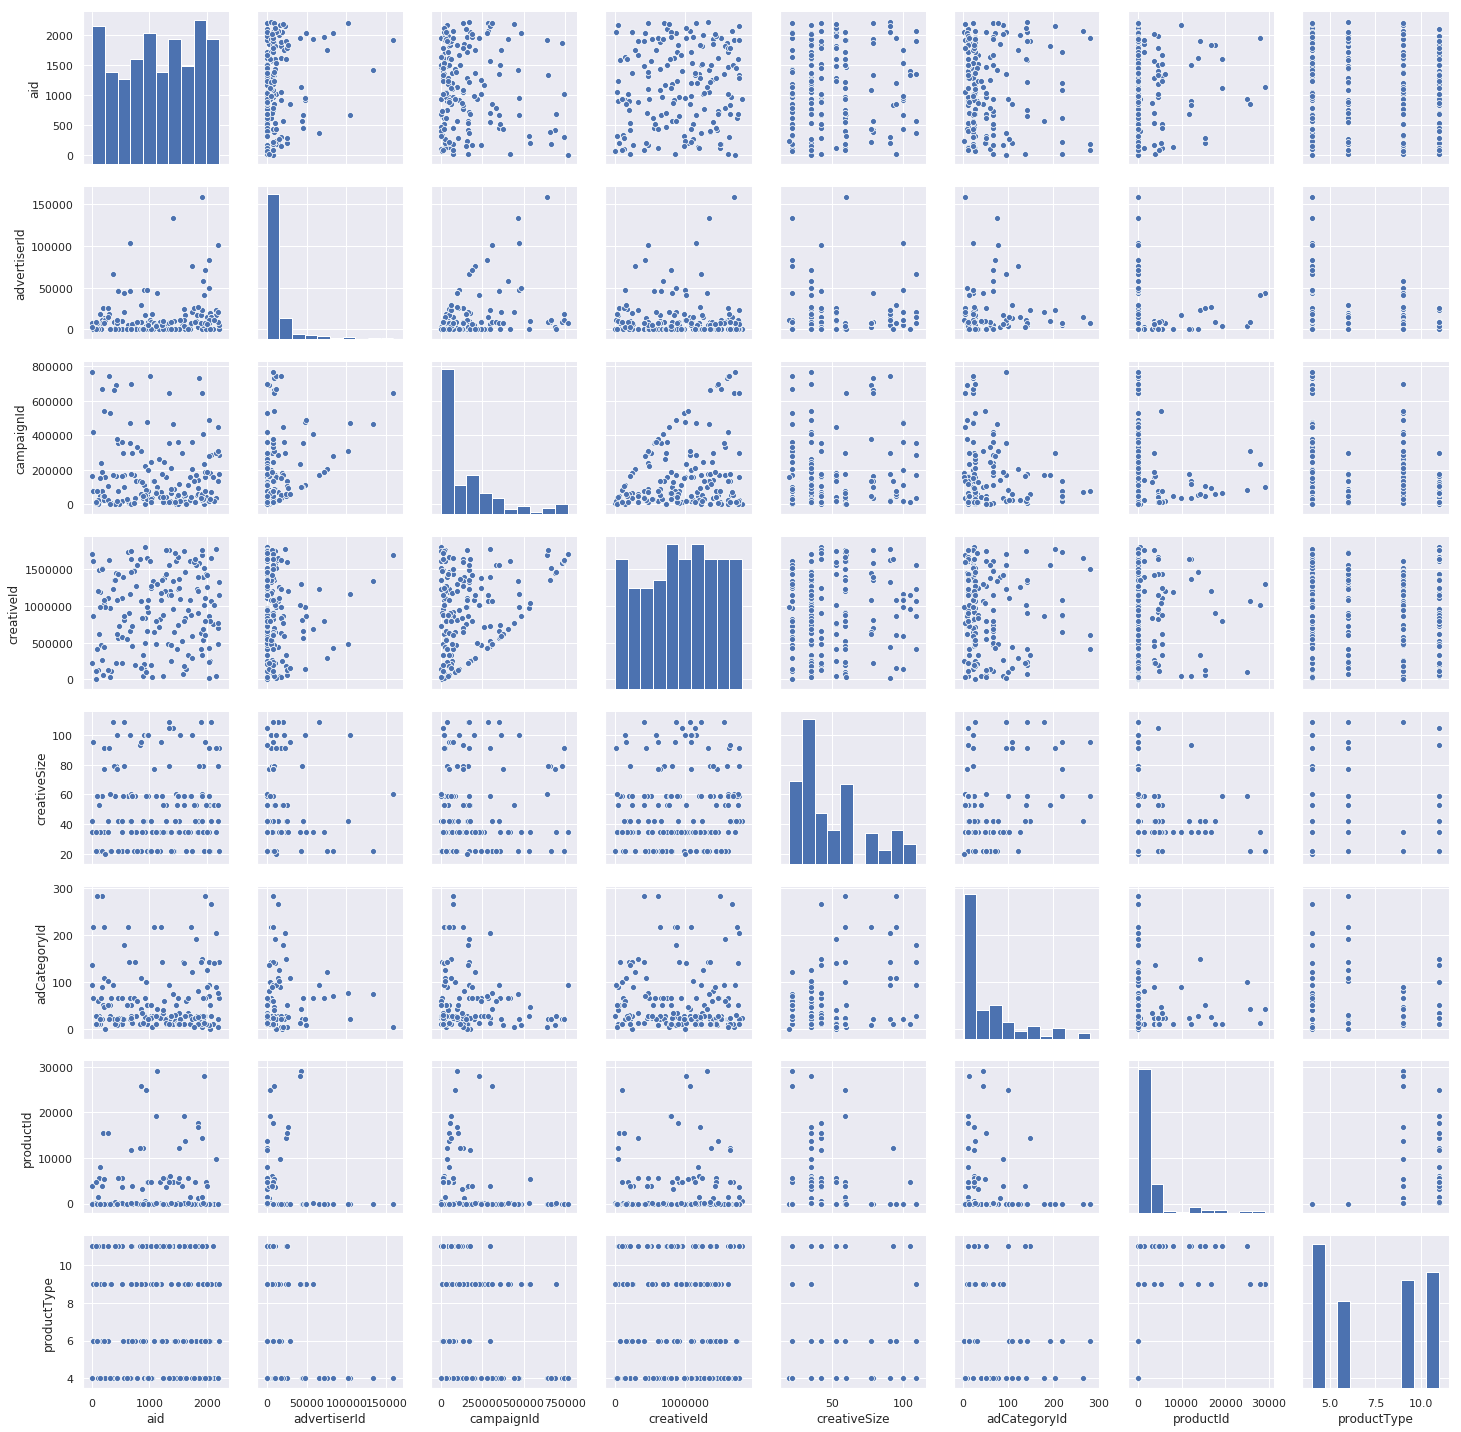

In [70]:
sns.pairplot(adFeature)

**Finally, we analyse the composition of user features**

In [11]:
userFeature.head(3)

,uid,age,gender,marriageStatus,education,consumptionAbility,LBS,interest1,interest2,interest3,...,kw3,topic1,topic2,topic3,appIdInstall,appIdAction,ct,os,carrier,house
0,33510376,1,2,10,7,1,795.0,NaN,NaN,NaN,...,NaN,NaN,5169 8402 9808 4812 105,NaN,NaN,NaN,3,2 1,1,NaN
1,59063212,3,1,11,2,2,932.0,93 70 77 109 100 48 39 46 36 11,47 24 20 30,NaN,...,NaN,8553 1042 8747 523 9826,9815 7593 7956 8813 9275,NaN,NaN,NaN,3 1,1,0,NaN
2,9603408,1,2,10,2,2,280.0,70 86 76 69 28 59 49 122 6 2 42 73 26 35 116 3...,73 31 1 46 70 3 74 44 37 29,NaN,...,NaN,9826 6058 8003 9927 7684,218 3545 8883 986 4994,NaN,NaN,NaN,3 1,2,1,NaN


In [12]:
userFeature.dtypes

uid                     int64
age                     int64
gender                  int64
marriageStatus         object
education               int64
consumptionAbility      int64
LBS                   float64
interest1              object
interest2              object
interest3              object
interest4              object
interest5              object
kw1                    object
kw2                    object
kw3                    object
topic1                 object
topic2                 object
topic3                 object
appIdInstall           object
appIdAction            object
ct                     object
os                     object
carrier                 int64
house                 float64
dtype: object

<div class="alert alert-warning">
We can find that there exists a lot of "object" data type which should be better presented.
</div>

In [13]:
def objet_to_listNum(df):
    columns = df.columns
    for i in columns:
        if df[i].dtype == 'object':
            df[i] = df[i].str.split(' ')
    
    return df

userFeature = objet_to_listNum(userFeature)

Now we present some distributions of features

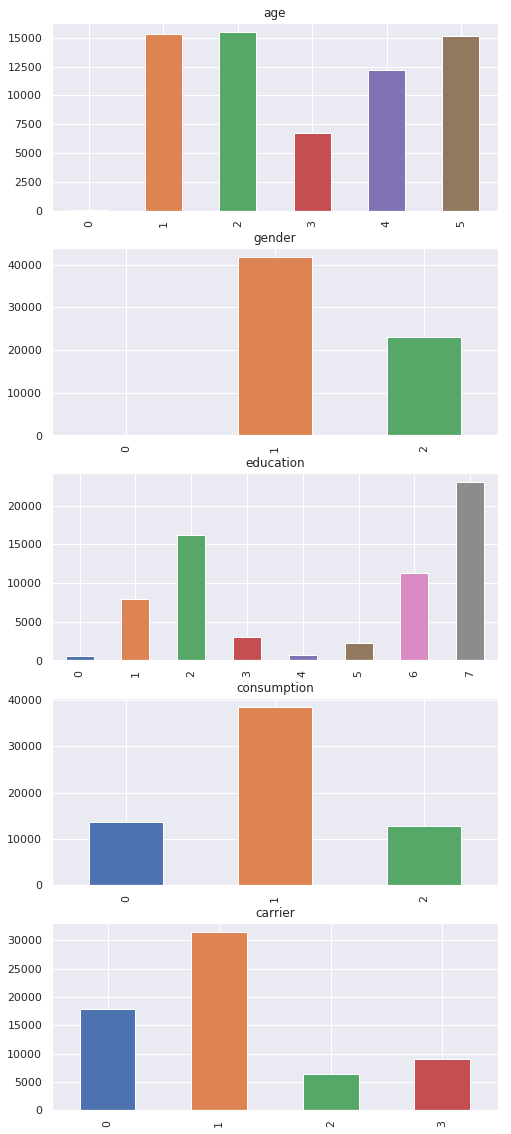

In [14]:
fig,axes = plt.subplots(nrows=5,ncols=1,figsize=(8,20))



userFeature['age'].value_counts(sort=False).plot(ax=axes[0],kind='bar',title="age")
userFeature['gender'].value_counts(sort=False).plot(ax=axes[1],kind='bar',title='gender')
userFeature['education'].value_counts(sort=False).plot(ax=axes[2],kind='bar',title='education')
userFeature['consumptionAbility'].value_counts(sort=False).plot(ax=axes[3],kind='bar',title='consumption')
userFeature['carrier'].value_counts(sort=False).plot(ax=axes[4],kind='bar',title="carrier")


We can calculate the missing data in this data set

In [36]:
missing_userF = (userFeature.isnull()/len(userFeature)).sum()
missing_userF = missing_userF.sort_values(ascending=False)

In [38]:
print("Percentage of missing value for each feature:\n-----------\n")
for i,j in zip(missing_userF.index,missing_userF.values):
    print(i," "* (20-len(i)),"%.2f"%j)

Percentage of missing value for each feature:
-----------

appIdAction           0.98
interest4             0.98
appIdInstall          0.98
interest3             0.97
kw3                   0.95
topic3                0.95
house                 0.82
interest2             0.33
interest5             0.25
kw1                   0.10
interest1             0.09
topic1                0.09
topic2                0.04
kw2                   0.03
carrier               0.00
ct                    0.00
os                    0.00
LBS                   0.00
consumptionAbility    0.00
education             0.00
marriageStatus        0.00
gender                0.00
age                   0.00
uid                   0.00


<div class="alert alert-warning">
We can find that there exists a lot of missing values for us to deal with.
</div>

We can also show the distribution of one feature in each catagory of another feature to deduce potential relation.

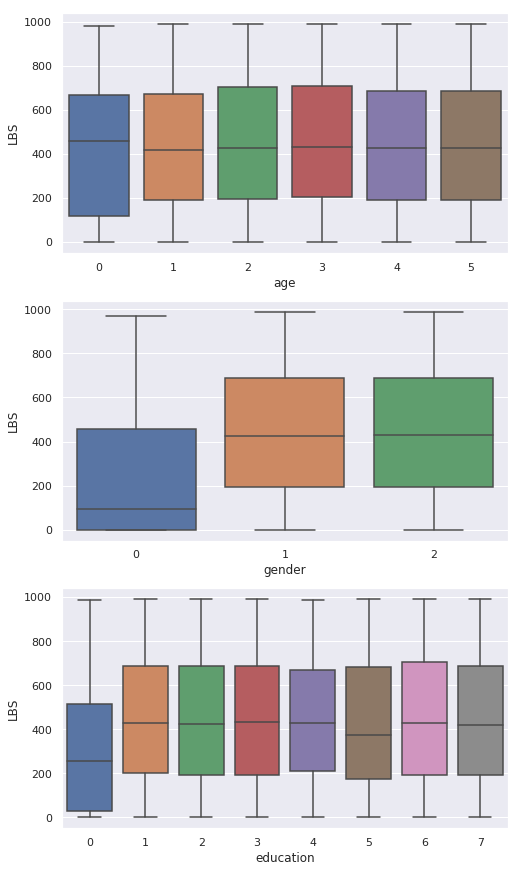

In [63]:
fig,axes = plt.subplots(nrows=3,ncols=1,figsize=(8,15))
sns.boxplot(x="age",y="LBS",ax=axes[0],data=userFeature)
sns.boxplot(x="gender",y="LBS",ax=axes[1],data=userFeature)
sns.boxplot(x="education",y="LBS",ax=axes[2],data=userFeature)

plt.show()


We can see a lot of valuable information about the dataset, and use it for further feature engineering.